In [1]:
import tensorflow as tf #importing tensorflow and keras modules
from tensorflow import keras #importing different keras components
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [2]:
import numpy as np #importy numpy and keras
from keras.models import Model
from keras.layers import Dense,Input,Dropout,LSTM,Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform

Using TensorFlow backend.


In [3]:
from keras.datasets import imdb #downloading the imdb dataset from keras database
top_words = 10000 #considering only the top 10000 most common words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words) #loading the test and train sets

In [4]:
max_length = 500 #maximum length of a review
X_train = sequence.pad_sequences(X_train, maxlen=max_length)#padding
X_test = sequence.pad_sequences(X_test, maxlen=max_length)#padding

In [5]:
max_review_length = 500
# creating the model
embedding_vector_length = 32 #length of the embedding vector
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(tf.keras.layers.Conv1D(
filters=55,kernel_size=2, padding = 'valid', activation = 'relu'))
model.add(tf.keras.layers.Bidirectional(
tf.keras.layers.LSTM(50,dropout=0.60,recurrent_dropout=0.60)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 499, 55)           3575      
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               42400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 366,076
Trainable params: 366,076
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) #using adam optimizer and binary cross entropy for error

In [7]:
history = model.fit(X_train, y_train, epochs=3, batch_size=100,validation_data = (X_test,y_test)) #fitting the dataset

Epoch 1/3
250/250 [==============================] - 107s 427ms/step - loss: 0.6184 - accuracy: 0.6271 - val_loss: 0.4373 - val_accuracy: 0.8336
Epoch 2/3
250/250 [==============================] - 106s 425ms/step - loss: 0.3126 - accuracy: 0.8757 - val_loss: 0.4848 - val_accuracy: 0.8476
Epoch 3/3
250/250 [==============================] - 106s 425ms/step - loss: 0.2342 - accuracy: 0.9112 - val_loss: 0.3533 - val_accuracy: 0.8722


In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [9]:
import matplotlib.pyplot as plt #importing the matplitlib library to plot the model performance

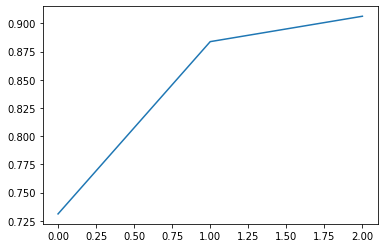

In [10]:
plt.plot(history.history['accuracy']) #plotting train accuracy

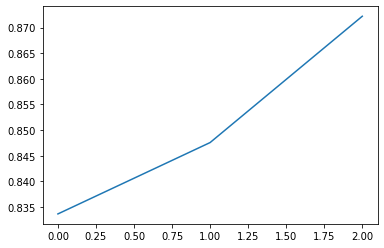

In [11]:
plt.plot(history.history['val_accuracy']) #plotting validation accuracy

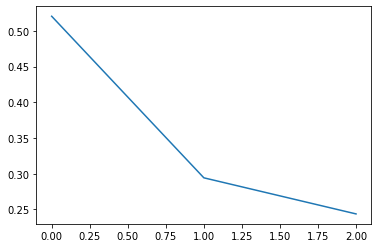

In [12]:
plt.plot(history.history['loss']) #plotting train loss

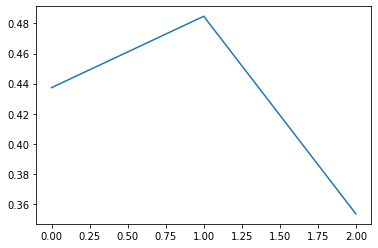

In [13]:
plt.plot(history.history['val_loss']) plotting validation loss

In [14]:
model.save("Sentiment analysis model") #saving the model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Sentiment analysis model/assets
